In [30]:
from scipy.signal import correlate2d
import numpy as np
import matplotlib.pyplot as plt

In [13]:
length = 100
matrix_a = np.random.rand(length, length)
matrix_b = np.random.rand(length, length)

In [14]:
%timeit correlate2d(matrix_a, matrix_b)

752 ms ± 16 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
x_autocor = [correlate2d(matrix_a, np.roll(matrix_a, shift, axis=0)) for shift in range(1, 100)]

In [17]:
y_autocor = [correlate2d(matrix_a, np.roll(matrix_a, shift, axis=1)) for shift in range(1, 100)]

In [159]:
from numpy.fft import fft, ifft, fftshift
from scipy.signal import correlate

In [331]:
L=16
data = np.array(list(range(L)))
print(data)
print([i**2 for i in data])
print(sum([i**2 for i in data]))
print(sum([i**2 for i in data])/L)
print(np.sqrt(sum([(i-np.mean(data))**2 for i in data])/(L)))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225]
1240
77.5
4.6097722286464435


In [332]:
print(f" sum: {np.sum(data)}, mean: {np.mean(data)}, std: {np.std(data)}")

 sum: 120, mean: 7.5, std: 4.6097722286464435


In [351]:
F = fft(data-np.mean(data))
S =  (F*np.conjugate(F))
#print(S)

R = ifft(S)[:F.size//2]

print(np.sqrt(np.abs(R.real/L)))

lag = 1
A = sum([i*j for i,j in zip(data[lag:], data[:-lag])])/L
print(np.sqrt(A - np.mean(data)**2))

[4.60977223 3.70809924 2.6925824  1.32287566 1.6583124  2.5
 2.95803989 3.20156212]
3.7080992435478315


In [52]:
L//2

16

In [70]:
np.fft.fftfreq(20, d=1.0)

array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
        0.45, -0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15,
       -0.1 , -0.05])

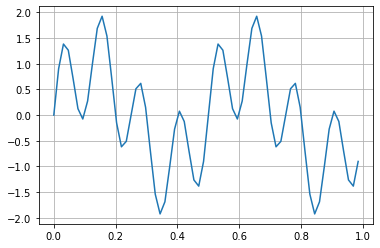

In [391]:
L = 64
data = np.arange(L)
freq = 8
signal = np.sin(freq*data*2*np.pi/L)

freq = 2
signal += np.sin(freq*data*2*np.pi/L)

#signal += np.random.rand(L)

#signal -= np.mean(signal)

plt.plot(data/L, signal)
plt.grid()
plt.show()

/usr/local/anaconda3/envs/tensorflow.1.12/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


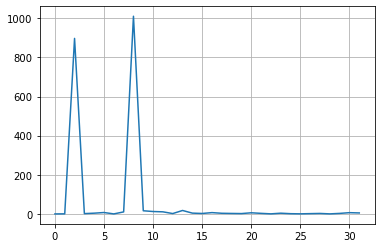

In [390]:
F = fft(signal)
S = F*np.conjugate(F)

plt.plot(S[:F.size//2])
plt.grid()
plt.show()

In [363]:
import sys
sys.path.insert(0, '../../../clones/PINNs/Utilities/')
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

import os
data_path = os.path.abspath("../turing.npy")
with open(data_path, 'rb') as f:
    data = np.load(f)
    
data_path = os.path.abspath("../turing_t.npy")
with open(data_path, 'rb') as f:
    t_star = np.load(f) 
    
T = 32

x_size = data.shape[1]
y_size = data.shape[2]
N = x_size*y_size

AA = np.einsum('ijk->kij', data[0, :, :, -T:]) # N x T
SS = np.einsum('ijk->kij', data[1, :, :, -T:]) # N x T

a = AA[-1,:,:]
s = SS[-1,:,:]

In [373]:
a.shape

(32, 32)

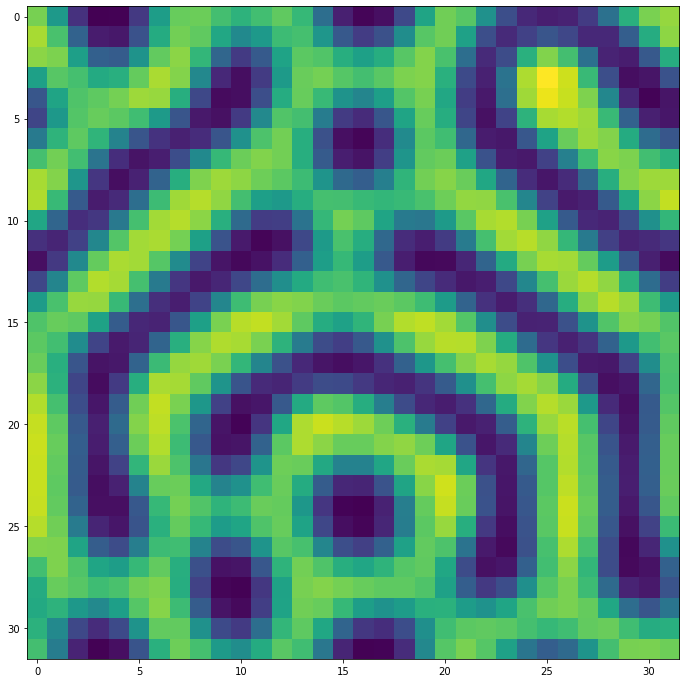

In [386]:
_ = plt.figure(figsize=(12,12))
plt.imshow(a)
plt.show()

In [380]:
F_2d = fft(a-np.mean(a), axis=1)
S_2d =  (F_2d*np.conjugate(F_2d))

L = a.shape[0]

R_2d = ifft(S_2d)[:L//2, :]
acorr_2d = np.sqrt(np.abs(R_2d.real/L))


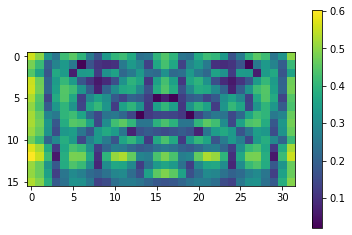

In [381]:

plt.imshow(acorr_2d)
plt.colorbar()
plt.show()

In [385]:
np.mean(np.argmax(acorr_2d, axis=0))

10.4375